### Cross Validation
Cross-validation is a step in the process of building a machine learning model which helps us ensure that our models fit the data accurately and also ensures that we do not overfit.

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import model_selection

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [7]:
# use map function to convert the quality values to 0-5
quality_mapping = { 3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
} # define the mapping dict

df.loc[:, 'quality']=df.quality.map(quality_mapping)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [8]:
df.shape

(1599, 12)

In [9]:
# use sample with frac=1 to shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows for training
df_train = df.head(1000)

# bottom 599 values for testing/validation
df_test = df.tail(599)

In [19]:
cols = df.columns[:-1] #feature columns

In [20]:
cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [21]:
#initialize the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)

clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [22]:
train_pred = clf.predict(df_train[cols])
test_pred = clf.predict(df_test[cols])

train_accu = metrics.accuracy_score(df_train.quality, train_pred)
test_accu = metrics.accuracy_score(df_test.quality, test_pred)

In [23]:
print('training data accuracy:', train_accu)
print('testing data accuracy:', test_accu)

training data accuracy: 0.573
testing data accuracy: 0.5559265442404007


In [25]:
# try different values of max_depth and see how training and test accuracy change
train_accuracies = []
test_accuracies = []

for depth in range(1, 25):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train[cols], df_train.quality)
    
    train_pred = clf.predict(df_train[cols])
    test_pred = clf.predict(df_test[cols])

    train_accu = metrics.accuracy_score(df_train.quality, train_pred)
    test_accu = metrics.accuracy_score(df_test.quality, test_pred)
    train_accuracies.append(train_accu)
    test_accuracies.append(test_accu)

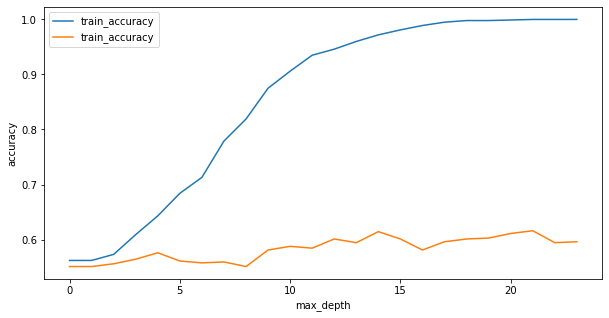

In [26]:
plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label = 'train_accuracy')
plt.plot(test_accuracies, label = 'train_accuracy')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

With the increase of max_depth, the training accuracy keeps increasing but tesing accuracy doesn't improve, overfitting occurs.

#### k-folder cross validation 

In [28]:
df = pd.read_csv("winequality-red.csv")

# create a new column called kfold and fill it with -1
df["kfold"] = -1

# randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df)): 
    df.loc[val_, 'kfold'] = fold

# save the new csv with kfold column
df.to_csv("train_folds.csv", index=False)

In [29]:
df.kfold.unique()

array([0, 1, 2, 3, 4])

In [30]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,6.1,0.59,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,11.4,5,0
1,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,5,0
2,11.5,0.35,0.49,3.3,0.070,10.0,37.0,1.00030,3.32,0.91,11.0,6,0
3,8.2,0.28,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8,7,0
4,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8,0


#### stratified k-fold cross validation
For skewed dataset, stratified k-fold cross-validation keeps the ratio of labels in each fold constant.

Text(0, 0.5, 'count')

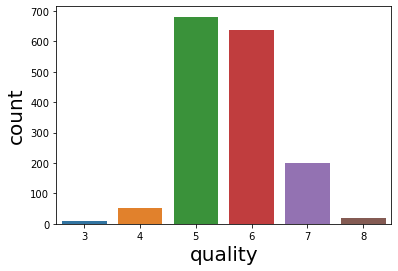

In [32]:
# visualize the distribution of labels
b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)

The label is very much skewed, should choose stratified k-fold in this case.

In [33]:
df = pd.read_csv("winequality-red.csv")

# create a new column called kfold and fill it with -1
df["kfold"] = -1

# randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True) 

# fetch targets
y = df.quality.values

# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)): 
    df.loc[v_, 'kfold'] = f

# save the new csv with kfold column
df.to_csv("train_stratified_folds.csv", index=False)

### Summary
For classification problem, choose stratified k-fold blindly.
For regression problem, simple k-fold cross validation works in most caess.